<a href="https://colab.research.google.com/github/DGkurnia/discuss1/blob/main/airquality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Derfansyah Guswiranata Kurnia]
- **Email:** [weerakurnia@gmail.com]
- **ID Dicoding:** [dgkurnia]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana kondisi suhu di dua belas kota dari tahun 2013 samapai 2017 ?
- Pertanyaan 2 : Bagaimana pemeriksaan ukuran partikuler (untuk PM 2.5 dan PM 10) di dua belas kota dari tahun 2013 sampai 2017 ?.
- Pertanyaan 3 : Bagaimana pemeriksaan kadar sulfur dioksida (SO2), kadar nitrogen monoksida (NO) dan karbon monoksida (CO) di dua belas kota dari tahun 2013 sampai 2017 ?.
- Pertanyaan 4 : Bagaimana pemeriksaan kondisi gas ozone (O3) dari tahun 2013 sampai 2017 ?.

## Impor Semua Paket/Library yang Digunakan
Kumpulan perpustakaan Python yang dipakai untuk proyek:


In [1]:
from google.colab import drive
drive.mount('/content/drive') #dasar instalasi file dari Google Drive

Mounted at /content/drive


In [2]:
#persiapan perpustakaan dan file untuk pembersihan
import numpy as np
import pandas as pd #dasar pengelolaan data
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime # dasar pengelolaan data berbasis waktu
from scipy.interpolate import interp1d #interpolasi linear
from scipy.stats import skew #pemeriksaan kecendrungan dari histogram
import plotly.express as px #kecendrungan dari plot kotak

## Tahap 'Data Wrangling'
Pada tahap ini, jumlah dataframe yang akan dianalisis adalah 12 unit

In [3]:

#persiapan insersi data
dfaotizhongxin = pd.read_csv('/content/drive/MyDrive/csv-files/aqins/aotizhongxin.csv')
dfchangping = pd.read_csv('/content/drive/MyDrive/csv-files/aqins/changping.csv')
dfdingling = pd.read_csv('/content/drive/MyDrive/csv-files/aqins/dingling.csv')
dfdongsi = pd.read_csv('/content/drive/MyDrive/csv-files/aqins/dongsi.csv')
dfguanyuan = pd.read_csv('/content/drive/MyDrive/csv-files/aqins/guanyuan.csv')
dfgucheng = pd.read_csv('/content/drive/MyDrive/csv-files/aqins/gucheng.csv')
dfhuairou = pd.read_csv('/content/drive/MyDrive/csv-files/aqins/huairo.csv')
dfnonzhanguan = pd.read_csv('/content/drive/MyDrive/csv-files/aqins/nonzhanguan.csv')
dfshunyi = pd.read_csv('/content/drive/MyDrive/csv-files/aqins/shunyi.csv')
dftiantan = pd.read_csv('/content/drive/MyDrive/csv-files/aqins/tiantan.csv')
dfwanliu = pd.read_csv('/content/drive/MyDrive/csv-files/aqins/wanliu.csv')
dfwanshouxigong = pd.read_csv('/content/drive/MyDrive/csv-files/aqins/wanshouxigong.csv')
"""
Kota awal adalah Aotizhungxin dan kota akhir adalah Wanshouxigong
"""

'\nKota awal adalah Aotizhungxin dan kota akhir adalah Wanshouxigong\n'

### Tahap Pengumpulan (Gathering Data)
#### rincian dari pengumpulan data : ada 12 dataset kota yang terdiri dari
* Nomor
* Tahun
* Bulan
* Jam
* kadar partikulat (PM 2.5 dan 10)
* kadar senyawa SO2, NO, CO, dan O3 (dalam mikrogram/ m^3)
* tempratur (dalam celsius)
* Nilai tekanan (dalam hektoPascal)
* arah angin dan kecepatan angin
-- Nilai Tahun, bulan dan jam bisa diubah menjadi tanggal.


In [4]:
"""
pemeriksaan data dari data kurang lengkap untuk enam kota pertama :
(kota Aotizhongxin sampai Huairo)
"""

#dfaotizhongxin.info()
#dfaotizhongxin.isnull().sum()
#dfaotizhongxin.duplicated().sum() # kota Aotizhongxin
#dfchangping.info()
#dfchangping.isnull().sum()
#dfchangping.duplicated().sum() # Changping
#dfdongsi.isnull().sum()
#dfdongsi.duplicated().sum()
#dfdingling.info()
#dfdingling.isnull().sum()
#dfdingling.duplicated().sum() #Dingling


'\npemeriksaan data dari data kurang lengkap untuk enam kota pertama :\n(kota Aotizhongxin sampai Huairo)\n'

## Rincian dataset
(urutan data dari awal sampai akhir)
*   kode 'dfaotizhongxin' untuk dataframe di Kota Aotizhongxin
*   kode 'dfchangping' untuk dataframe di Kota Changping
* kode 'dfdingling' untuk dataframe di Kota Dingling
* kode 'dfguanyuan' untuk dataframe di kota Guanyuan
* kode 'dfgucheng' untuk dataframe di kota Gucheng
* kode 'dfhuairou' untuk dataframe di kota Huairo (pengucapan cina 'Huairo' adalah 'Huairou')
*kode 'dfnonzhanguan' untuk dataframe di kota Nonzhanguan
* kode 'dfshunyi' untuk dataframe di kota Shunyi
* kode 'dftiantan' untuk dataframe di kota Tiantan
* kode 'dfwanliu' untuk untuk dataframe di kota Wanliu
* kode 'dfwanshouxigong' untuk untuk dataframe di kota Wanshouxigong

### Tahap 'Assessing Data'
#### Hal yang diperhatikan dalam pemeriksaan kadar udara
- Total data duplikat
-- Aotizhongxin : tidak ada
-- Changpin : Tidak ada
- Jumlah data hilang di masing-masing unit
-- Kota Aotizhingxin : 925 data di PM2.5, 718 di PM 10. Tiga kolom memiliki data kosong di atas 500
-- Kota Changpin : banyak data hilang berada di pemeriksaan empat gas tersebut
--- Kota lain memiliki kecendrungan untuk memiliki data kosong di kondisi tersebut
#### Hal unik lain
Forrmat tanggal yang salah (awalnya tahun, bulan, hari, dan jam) yang dipisah

In [5]:
"""
pemeriksaan data dari data kurang lengkap untuk enam kota terakhir :
(kota Nonzhanguan sampai Wanshouxigong)
"""

#dfnonzhanguan.info()
#dfnonzhanguan.isnull().sum()
#dfnonzhanguan.duplicated().sum() #Nonzhanguan
#dfwanshouxigong.info()


'\npemeriksaan data dari data kurang lengkap untuk enam kota terakhir :\n(kota Nonzhanguan sampai Wanshouxigong)\n'

### Proses Pembersihan (Cleaning) Data
#### Pengantar : Data ini bisa dimanfaatkan untuk pengaturan sehingga proses yang sesuai untuk pembersihan data adalah interpolasi kolom indikator yang berangka demi menjaga aspek kolom yang hilang. Di sisilain, pengisian data dengan modus berlaku untuk kolom non integer
Tahapan pembersihan data
(hal ini berlaku untuk 12 kota)
1.   Pengubahan format waktu dan menghapus format salah (Tahun, bulan, angka, dan jam)
2. Proses interpolasi untuk kolom hilang di indikator yang dibutuhkan
3. Pengisian nilai non numerik yang hilang




In [6]:
#pembersihan bagian pertama (pengubahan format data waktu) untuk dua belas kota
dfaotizhongxin['datetime'] = dfaotizhongxin[['year', 'month', 'day', 'hour']].apply(lambda x: datetime(*x), axis=1)
dfchangping['datetime'] = dfchangping[['year', 'month', 'day', 'hour']].apply(lambda x: datetime(*x), axis=1)
dfdingling['datetime'] = dfdingling[['year', 'month', 'day', 'hour']].apply(lambda x: datetime(*x), axis=1)
dfdongsi['datetime'] = dfdongsi[['year', 'month', 'day', 'hour']].apply(lambda x: datetime(*x), axis=1)
dfguanyuan['datetime'] = dfguanyuan[['year', 'month', 'day', 'hour']].apply(lambda x: datetime(*x), axis=1)
dfgucheng['datetime'] = dfgucheng[['year', 'month', 'day', 'hour']].apply(lambda x: datetime(*x), axis=1)
dfhuairou['datetime'] = dfhuairou[['year', 'month', 'day', 'hour']].apply(lambda x: datetime(*x), axis=1)
dfnonzhanguan['datetime'] = dfnonzhanguan[['year', 'month', 'day', 'hour']].apply(lambda x: datetime(*x), axis=1)
dfshunyi['datetime'] = dfshunyi[['year', 'month', 'day', 'hour']].apply(lambda x: datetime(*x), axis=1)
dftiantan['datetime'] = dftiantan[['year', 'month', 'day', 'hour']].apply(lambda x: datetime(*x), axis=1)
dfwanliu['datetime'] = dfwanliu[['year', 'month', 'day', 'hour']].apply(lambda x: datetime(*x), axis=1)
dfwanshouxigong['datetime'] = dfwanshouxigong[['year', 'month', 'day', 'hour']].apply(lambda x: datetime(*x), axis=1)

#penghapusan kolom 'tahun' dan tiga indeks lain untuk 12 kota (dari Aotizhongxin sampai Wanshouxigong)

dfaotizhongxin.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
dfchangping.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
dfdingling.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
dfdongsi.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
dfguanyuan.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
dfgucheng.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
dfhuairou.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
dfnonzhanguan.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
dfshunyi.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
dftiantan.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
dfwanliu.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
dfwanshouxigong.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)

#pemeriksaan kolom untuk memeriksa jika kota sudah memiliki indikator waktu
#dfaotizhongxin.head(10) #Kota Aotizhongxin
#dfchangping.head(10)# Kota Changping
#dfdingling.head(10)# Kota Dingling
#dfdongsi.head(10)# Kota Dongsi
#dfguanyuan.head(10)# Kota Guanyuan
#dfgucheng.head(10)# Kota Gucheng
#dfhuairou.head(10)# Kota Huairou
#dfnonzhanguan.head(10) #kota Nanzhanguan
#dfshunyi.head(10) #kota sunyi
#dftiantan.head(10) #Kota Tiantan
#dfwanliu.head(10) #Kota Wanliu
#dfwanshouxigong.head(10) #Kota Wanshouxigong
#hasil ini untuk memeriksa penghapusan kolom waktu

In [7]:
"""
#bagian dua (proses interpolasi kolom)
Tahap pertama pemeriksaan data yang hilang untuk masing-masing kota dari Aotizhongxing sampai Wanshouxigong
"""
# pemeriksan total kolom kosong untuk interpolasi
#dfaotizhongxin.isnull().sum() #untuk memeriksa kolom sebelum interpolasi (Aotizhongxing)
#dfchangping.isnull().sum() #untuk memeriksa kolom sebelum interpolasi (Changping)
#dfdingling.isnull().sum() #untuk memeriksa kolom sebelum interpolasi (Dingling)
#dfdongsi.isnull().sum() #untuk memeriksa kolom sebelum interpolasi (Dongsi)
#dfguanyuan.isnull().sum() #untuk memeriksa kolom sebelum interpolasi (Guanyuan)
#dfgucheng.isnull().sum() #untuk memeriksa kolom sebelum interpolasi (Gucheng)
#dfhuairou.isnull().sum() #untuk memeriksa kolom sebelum interpolasi (Huairou)
#dfnonzhanguan.isnull().sum() #untuk memeriksa kolom sebelum interpolasi (Nonzhanguan)
#dfshunyi.isnull().sum() #untuk memeriksa kolom sebelum interpolasi (Shunyi)
#dftiantan.isnull().sum() #untuk memeriksa kolom sebelum interpolasi (Tiantan)
#dfwanliu.isnull().sum() #untuk memeriksa kolom sebelum interpolasi (Wanliu)
#dfwanshouxigong.isnull().sum() #untuk memeriksa kolom sebelum interpolasi (Wanshouxigong)

'\n#bagian dua (proses interpolasi kolom)\nTahap pertama pemeriksaan data yang hilang untuk masing-masing kota dari Aotizhongxing sampai Wanshouxigong\n'

##Resume Kolom Hilang Data untuk Interpolasi Linear:

*   Sebagian besar kolom hilang bisa 'diinterpolasi' untuk menjaga orisinilitas data
*   Proses ini melibatkan dua belas Kota
* Proses interpolasi data memakai kombinasi antara interpolasi linear dan interpolasi nilai terdekat
Proses

In [8]:
#Persiapan pengisian data di 'dfdongsi'
dfdongsi[['SO2', 'NO2', 'CO', 'O3']] = dfdongsi[['SO2', 'NO2', 'CO', 'O3']].fillna(dfdongsi[['SO2', 'NO2', 'CO', 'O3']].median())
#dfdongsi.isnull().sum() #untuk memeriksa kolom setelah interpolasi (Dongsi)
#pemeriksan baris kosong
#dfdongsi.isnull().sum()

In [9]:
# persiapan interpolasi (Aotizhongxin sampai terakhir) di kolom PM2.5 dan PM10 sebelum pembersihan data
dfaotizhongxin['PM2.5'] = dfaotizhongxin['PM2.5'].interpolate(method='nearest')
dfaotizhongxin['PM10'] = dfaotizhongxin['PM10'].interpolate(method='nearest')
#Area Aotizhongxin
dfchangping['PM2.5'] = dfchangping['PM2.5'].interpolate(method='nearest')
dfchangping['PM10'] = dfchangping['PM10'].interpolate(method='nearest')
#Area Changping
dfdingling['PM2.5'] = dfdingling['PM2.5'].interpolate(method='nearest')
dfdingling['PM10'] = dfdingling['PM10'].interpolate(method='nearest')
#Area Dingling
dfdongsi['PM2.5'] = dfdongsi['PM2.5'].interpolate(method='nearest')
dfdongsi['PM10'] = dfdongsi['PM10'].interpolate(method='nearest')
#Area Dongsi
dfguanyuan['PM2.5'] = dfguanyuan['PM2.5'].interpolate(method='nearest')
dfguanyuan['PM10'] = dfguanyuan['PM10'].interpolate(method='nearest')
#Area Guanyuan
dfgucheng['PM2.5'] = dfgucheng['PM2.5'].interpolate(method='nearest')
dfgucheng['PM10'] = dfgucheng['PM10'].interpolate(method='nearest')
#Area Gucheng
dfhuairou['PM2.5'] = dfhuairou['PM2.5'].interpolate(method='nearest')
dfhuairou['PM10'] = dfhuairou['PM10'].interpolate(method='nearest')
#Area Huairou
dfnonzhanguan['PM2.5'] = dfnonzhanguan['PM2.5'].interpolate(method='nearest')
dfnonzhanguan['PM10'] = dfnonzhanguan['PM10'].interpolate(method='nearest')
#Area Nonzhanguan
dfshunyi['PM2.5'] = dfshunyi['PM2.5'].interpolate(method='nearest')
dfshunyi['PM10'] = dfshunyi['PM10'].interpolate(method='nearest')
#Area Shunyi
dftiantan['PM2.5'] = dftiantan['PM2.5'].interpolate(method='nearest')
dftiantan['PM10'] = dftiantan['PM10'].interpolate(method='nearest')
#Area Tiantan
dfwanliu['PM2.5'] = dfwanliu['PM2.5'].interpolate(method='nearest')
dfwanliu['PM10'] = dfwanliu['PM10'].interpolate(method='nearest')
#Area Wanliu
dfwanshouxigong['PM2.5'] = dfwanshouxigong['PM2.5'].interpolate(method='nearest')
dfwanshouxigong['PM10'] = dfwanshouxigong['PM10'].interpolate(method='nearest')
#Area Wanshouxigong

In [10]:
#pemeriksaan nilai interpolasi linear untuk dua PM
#dfaotizhongxin[['PM2.5','PM10']] #untuk memeriksa kolom setelah interpolasi pertama (Aotizhongxing)
#dfchangping[['PM2.5','PM10']] #untuk memeriksa kolom setelah interpolasi pertama (Changping)
#dfdingling[['PM2.5','PM10']] #untuk memeriksa kolom setelah interpolasi pertama (Dingling)
#dfdongsi[['PM2.5','PM10']] #untuk memeriksa kolom setelah interpolasi pertama (Dongsi)
#pemeriksaan hasil interpolasi untuk nilai dua jenis meter
#dfaotizhongxin.isnull().sum() #untuk memeriksa kolom setelah interpolasi pertama PM (Aotizhongxing)
#dfchangping.isnull().sum() #untuk memeriksa kolom setelah interpolasi pertama PM (Changping)

##Bagian 2 pembersihan dataset untuk pemeriksaan empat senyawa (dalam mikro meter/ meter kubik)

In [11]:
#pembersihan data SO2, NO2, CO O3 di dataset (Aotizhongxin sampai Wanshouxigong)
dfaotizhongxin[['SO2', 'NO2', 'CO', 'O3']] = dfaotizhongxin[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='nearest') #Kota Aotizhongxin
dfchangping[['SO2', 'NO2', 'CO', 'O3']] = dfchangping[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='nearest') #Kota Changping
dfdingling[['SO2', 'NO2', 'CO', 'O3']] = dfdingling[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='nearest') #Kota Dingling
#dfdongsi[['SO2', 'NO2', 'CO', 'O3']] = dfdongsi[[['SO2', 'NO2', 'CO', 'O3']]].interpolate(method='nearest') #Kota Dongsi
dfguanyuan[['SO2', 'NO2', 'CO', 'O3']] = dfguanyuan[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='nearest') #Kota Guanyuan
dfgucheng[['SO2', 'NO2', 'CO', 'O3']] = dfgucheng[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='nearest') #Kota Gucheng
dfhuairou[['SO2', 'NO2', 'CO', 'O3']] = dfhuairou[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='nearest') #Kota Huairou
dfnonzhanguan[['SO2', 'NO2', 'CO', 'O3']] = dfnonzhanguan[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='nearest') #Kota Nonzhanguan
dfshunyi[['SO2', 'NO2', 'CO', 'O3']] = dfshunyi[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='nearest') #Kota Shunyi
dfwanliu[['SO2', 'NO2', 'CO', 'O3']] = dfwanliu[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='nearest') #Kota Wanliu
dfwanshouxigong[['SO2', 'NO2', 'CO', 'O3']] = dfwanshouxigong[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='nearest') #Kota Wanshouxigong

#pemeriksaan interpolasi konsentrasi gas
#dfaotizhongxin.isnull().sum() #untuk memeriksa kolom setelah interpolasi (Aotizhongxing)
#dfdongsi.info()

###Interpolasi suhu, tekanan, dan nilai tekanan dew secara linear

In [12]:
#persiapan proses interpolasi
dfaotizhongxin[['TEMP','PRES','DEWP']] = dfaotizhongxin[['TEMP','PRES','DEWP']].interpolate(method='linear') #Kota Aotizhongxin
dfchangping[['TEMP','PRES','DEWP']] = dfchangping[['TEMP','PRES','DEWP']].interpolate(method='linear') #Kota Changping
dfdingling[['TEMP','PRES','DEWP']] = dfdingling[['TEMP','PRES','DEWP']].interpolate(method='linear') #Kota Dingling
dfdongsi[['TEMP','PRES','DEWP']] = dfdongsi[['TEMP','PRES','DEWP']].interpolate(method='linear') #Kota Dongsi
dfguanyuan[['TEMP','PRES','DEWP']] = dfguanyuan[['TEMP','PRES','DEWP']].interpolate(method='linear') #Kota Guanyuan
dfgucheng[['TEMP','PRES','DEWP']] = dfgucheng[['TEMP','PRES','DEWP']].interpolate(method='linear') #Kota Gucheng
dfhuairou[['TEMP','PRES','DEWP']] = dfhuairou[['TEMP','PRES','DEWP']].interpolate(method='linear') #Kota Huairou
dfnonzhanguan[['TEMP','PRES','DEWP']] = dfnonzhanguan[['TEMP','PRES','DEWP']].interpolate(method='linear') #Kota Nonzhanguan
dfshunyi[['TEMP','PRES','DEWP']] = dfshunyi[['TEMP','PRES','DEWP']].interpolate(method='linear') #Kota Shunyi
dfwanliu[['TEMP','PRES','DEWP']] = dfwanliu[['TEMP','PRES','DEWP']].interpolate(method='linear') #Kota Wanliu
dfwanshouxigong[['TEMP','PRES','DEWP']] = dfwanshouxigong[['TEMP','PRES','DEWP']].interpolate(method='linear') #Kota Wanshouxigong


#Proses interpolasi untuk kadar hujan
dfaotizhongxin['RAIN'] = dfaotizhongxin['RAIN'].interpolate(method='linear') #Kota Aotizhongxin
dfchangping['RAIN'] = dfchangping['RAIN'].interpolate(method='linear') #Kota Changping
dfdingling['RAIN'] = dfdingling['RAIN'].interpolate(method='linear') #Kota Dingling
dfdongsi['RAIN'] = dfdongsi['RAIN'].interpolate(method='linear') #Kota Dongsi
dfguanyuan['RAIN'] = dfguanyuan['RAIN'].interpolate(method='linear') #Kota Guanyuan
dfgucheng['RAIN'] = dfgucheng['RAIN'].interpolate(method='linear') #Kota Gucheng
dfhuairou['RAIN'] = dfhuairou['RAIN'].interpolate(method='linear') #Kota Huairou
dfnonzhanguan['RAIN'] = dfnonzhanguan['RAIN'].interpolate(method='linear') #Kota Nonzhanguan
dfshunyi['RAIN'] = dfshunyi['RAIN'].interpolate(method='linear') #Kota Shunyi
dfwanliu['RAIN'] = dfwanliu['RAIN'].interpolate(method='linear') #Kota Wanliu
dfwanshouxigong['RAIN'] = dfwanshouxigong['RAIN'].interpolate(method='linear') #Kota Wanshouxigong

#pemeriksaan hasil interpolasi
#dfaotizhongxin.isnull().sum() #untuk memeriksa kolom setelah interpolasi kadar suhu tahap pertama (Aotizhongxing)

##Pengisian data hilang untuk arah angin dan kecepatan


In [13]:
#persiapan pengisian data hilang di arah angin
dfaotizhongxin['wd'] = dfaotizhongxin['wd'].fillna(method='ffill') #kota aotizhongxin
dfchangping['wd'] = dfchangping['wd'].fillna(method='ffill')
dfdingling['wd'] = dfdingling['wd'].fillna(method='ffill')
dfdongsi['wd'] = dfdongsi['wd'].fillna(method='ffill')
dfguanyuan['wd'] = dfguanyuan['wd'].fillna(method='ffill')
dfgucheng['wd'] = dfgucheng['wd'].fillna(method='ffill')
dfhuairou['wd'] = dfhuairou['wd'].fillna(method='ffill')
dfnonzhanguan['wd'] = dfnonzhanguan['wd'].fillna(method='ffill')
dfshunyi['wd'] = dfshunyi['wd'].fillna(method='ffill')
dftiantan['wd'] = dftiantan['wd'].fillna(method='ffill')
dfwanliu['wd'] = dfwanliu['wd'].fillna(method='ffill')
dfwanshouxigong['wd'] = dfwanshouxigong['wd'].fillna(method='ffill')

#interpolasi linear untuk kecepatan angin
dfaotizhongxin['WSPM'] = dfaotizhongxin['WSPM'].interpolate(method='linear') #Kota Aotizhongxin
dfchangping['WSPM'] = dfchangping['WSPM'].interpolate(method='linear') #Kota Changping
dfdingling['WSPM'] = dfdingling['WSPM'].interpolate(method='linear') #Kota Dingling
dfdongsi['WSPM'] = dfdongsi['WSPM'].interpolate(method='linear') #Kota Dongsi
dfguanyuan['WSPM'] = dfguanyuan['WSPM'].interpolate(method='linear') #Kota Guanyuan
dfhuairou['WSPM'] = dfhuairou['WSPM'].interpolate(method='linear') #Kota Huairou
dfnonzhanguan['WSPM'] = dfnonzhanguan['WSPM'].interpolate(method='linear') #Kota Nonzhanguan
dfshunyi['WSPM'] = dfshunyi['WSPM'].interpolate(method='linear') #Kota Shunyi
dftiantan['WSPM'] = dftiantan['WSPM'].interpolate(method='linear') #Kota Tiantan
dfwanliu['WSPM'] = dfwanliu['WSPM'].interpolate(method='linear') #Kota Wanliu
dfwanshouxigong['WSPM'] = dfwanshouxigong['WSPM'].interpolate(method='linear') #Kota Wanshouxigong



#Lanjutan untuk pembersihan tahap 2

In [14]:
#persiapan untuk interpolasi tahap 2 (PM2.5 dan PM10)
# persiapan interpolasi (Aotizhongxin sampai terakhir) di kolom PM2.5 dan PM10 sebelum pembersihan data
dfaotizhongxin['PM2.5'] = dfaotizhongxin['PM2.5'].interpolate(method='linear')
dfaotizhongxin['PM10'] = dfaotizhongxin['PM10'].interpolate(method='linear')
#Area Aotizhongxin
dfchangping['PM2.5'] = dfchangping['PM2.5'].interpolate(method='linear')
dfchangping['PM10'] = dfchangping['PM10'].interpolate(method='linear')
#Area Changping
dfdingling['PM2.5'] = dfdingling['PM2.5'].interpolate(method='linear')
dfdingling['PM10'] = dfdingling['PM10'].interpolate(method='linear')
#Area Dingling
dfdongsi['PM2.5'] = dfdongsi['PM2.5'].interpolate(method='linear')
dfdongsi['PM10'] = dfdongsi['PM10'].interpolate(method='linear')
#Area Dongsi
dfguanyuan['PM2.5'] = dfguanyuan['PM2.5'].interpolate(method='linear')
dfguanyuan['PM10'] = dfguanyuan['PM10'].interpolate(method='linear')
#Area Guanyuan
dfgucheng['PM2.5'] = dfgucheng['PM2.5'].interpolate(method='linear')
dfgucheng['PM10'] = dfgucheng['PM10'].interpolate(method='linear')
#Area Gucheng
dfhuairou['PM2.5'] = dfhuairou['PM2.5'].interpolate(method='linear')
dfhuairou['PM10'] = dfhuairou['PM10'].interpolate(method='linear')
#Area Huairou
dfnonzhanguan['PM2.5'] = dfnonzhanguan['PM2.5'].interpolate(method='linear')
dfnonzhanguan['PM10'] = dfnonzhanguan['PM10'].interpolate(method='linear')
#Area Nonzhanguan
dfshunyi['PM2.5'] = dfshunyi['PM2.5'].interpolate(method='linear')
dfshunyi['PM10'] = dfshunyi['PM10'].interpolate(method='linear')
#Area Shunyi
dftiantan['PM2.5'] = dftiantan['PM2.5'].interpolate(method='linear')
dftiantan['PM10'] = dftiantan['PM10'].interpolate(method='linear')
#Area Tiantan
dfwanliu['PM2.5'] = dfwanliu['PM2.5'].interpolate(method='linear')
dfwanliu['PM10'] = dfwanliu['PM10'].interpolate(method='linear')
#Area Wanliu
dfwanshouxigong['PM2.5'] = dfwanshouxigong['PM2.5'].interpolate(method='linear')
dfwanshouxigong['PM10'] = dfwanshouxigong['PM10'].interpolate(method='linear')
#Area Wanshouxigong

In [15]:
#untuk pemeriksaan senyawa tahap dua (SO2, NO2, CO O3 di dataset) (Aotizhongxin sampai Wanshouxigong)
dfaotizhongxin[['SO2', 'NO2', 'CO', 'O3']] = dfaotizhongxin[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear') #Kota Aotizhongxin
dfchangping[['SO2', 'NO2', 'CO', 'O3']] = dfchangping[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear') #Kota Changping
dfdingling[['SO2', 'NO2', 'CO', 'O3']] = dfdingling[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='nearest') #Kota Dingling
#dfdongsi[['SO2', 'NO2', 'CO', 'O3']] = dfdongsi[[['SO2', 'NO2', 'CO', 'O3']]].interpolate(method='linear') #Kota Dongsi
dfguanyuan[['SO2', 'NO2', 'CO', 'O3']] = dfguanyuan[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear') #Kota Guanyuan
dfgucheng[['SO2', 'NO2', 'CO', 'O3']] = dfgucheng[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear') #Kota Gucheng
dfhuairou[['SO2', 'NO2', 'CO', 'O3']] = dfhuairou[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear') #Kota Huairou
dfnonzhanguan[['SO2', 'NO2', 'CO', 'O3']] = dfnonzhanguan[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear') #Kota Nonzhanguan
dfshunyi[['SO2', 'NO2', 'CO', 'O3']] = dfshunyi[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear') #Kota Shunyi
dfwanliu[['SO2', 'NO2', 'CO', 'O3']] = dfwanliu[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear') #Kota Wanliu
dfwanshouxigong[['SO2', 'NO2', 'CO', 'O3']] = dfwanshouxigong[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear') #Kota Wanshouxigong


In [16]:
#Pembersihaan data di kadar senyawa & kadar hujan
#persiapan proses interpolasi tahap dua
dfaotizhongxin[['TEMP','PRES','DEWP']] = dfaotizhongxin[['TEMP','PRES','DEWP']].interpolate(method='nearest') #Kota Aotizhongxin
dfchangping[['TEMP','PRES','DEWP']] = dfchangping[['TEMP','PRES','DEWP']].interpolate(method='nearest') #Kota Changping
dfdingling[['TEMP','PRES','DEWP']] = dfdingling[['TEMP','PRES','DEWP']].interpolate(method='nearest') #Kota Dingling
dfdongsi[['TEMP','PRES','DEWP']] = dfdongsi[['TEMP','PRES','DEWP']].interpolate(method='nearest') #Kota Dongsi
dfguanyuan[['TEMP','PRES','DEWP']] = dfguanyuan[['TEMP','PRES','DEWP']].interpolate(method='nearest') #Kota Guanyuan
dfgucheng[['TEMP','PRES','DEWP']] = dfgucheng[['TEMP','PRES','DEWP']].interpolate(method='nearest') #Kota Gucheng
dfhuairou[['TEMP','PRES','DEWP']] = dfhuairou[['TEMP','PRES','DEWP']].interpolate(method='nearest') #Kota Huairou
dfnonzhanguan[['TEMP','PRES','DEWP']] = dfnonzhanguan[['TEMP','PRES','DEWP']].interpolate(method='nearest') #Kota Nonzhanguan
dfshunyi[['TEMP','PRES','DEWP']] = dfshunyi[['TEMP','PRES','DEWP']].interpolate(method='nearest') #Kota Shunyi
dftiantan[['TEMP','PRES','DEWP']] = dftiantan[['TEMP','PRES','DEWP']].interpolate(method='nearest') #Kota Tiantan
dfwanliu[['TEMP','PRES','DEWP']] = dfwanliu[['TEMP','PRES','DEWP']].interpolate(method='nearest') #Kota Wanliu
dfwanshouxigong[['TEMP','PRES','DEWP']] = dfwanshouxigong[['TEMP','PRES','DEWP']].interpolate(method='nearest') #Kota Wanshouxigong


#Proses interpolasi untuk kadar hujan
dfaotizhongxin['RAIN'] = dfaotizhongxin['RAIN'].interpolate(method='nearest') #Kota Aotizhongxin
dfchangping['RAIN'] = dfchangping['RAIN'].interpolate(method='nearest') #Kota Changping
dfdingling['RAIN'] = dfdingling['RAIN'].interpolate(method='nearest') #Kota Dingling
dfdongsi['RAIN'] = dfdongsi['RAIN'].interpolate(method='nearest') #Kota Dongsi
dfguanyuan['RAIN'] = dfguanyuan['RAIN'].interpolate(method='nearest') #Kota Guanyuan
dfgucheng['RAIN'] = dfgucheng['RAIN'].interpolate(method='nearest') #Kota Gucheng
dfhuairou['RAIN'] = dfhuairou['RAIN'].interpolate(method='nearest') #Kota Huairou
dfnonzhanguan['RAIN'] = dfnonzhanguan['RAIN'].interpolate(method='nearest') #Kota Nonzhanguan
dfshunyi['RAIN'] = dfshunyi['RAIN'].interpolate(method='nearest') #Kota Shunyi
dftiantan['RAIN'] = dftiantan['RAIN'].interpolate(method='nearest') #Kota Tiantan
dfwanliu['RAIN'] = dfwanliu['RAIN'].interpolate(method='nearest') #Kota Wanliu
dfwanshouxigong['RAIN'] = dfwanshouxigong['RAIN'].interpolate(method='nearest') #Kota Wanshouxigong


## Tahapa eksplorasi analisis data (EAD) / "'Exploratory Data Analysis' '(EDA)' "
* Bagian histogram dan kecendrungan
*Bagian plot kotak untuk inspeksi pencilan

In [17]:
#Bagian perhitungan kecendrungan dan plot kotak
#Area Pemeriksaan Kecendrungan
cenrayao = np.round([
    skew(dfaotizhongxin['PM2.5']), skew(dfaotizhongxin['PM10']),
    skew(dfaotizhongxin['SO2']), skew(dfaotizhongxin['NO2']), skew(dfaotizhongxin['CO']), skew(dfaotizhongxin['O3']),
    skew(dfaotizhongxin['TEMP']), skew(dfaotizhongxin['PRES']), skew(dfaotizhongxin['DEWP']),
    skew(dfaotizhongxin['RAIN']), skew(dfaotizhongxin['WSPM'])], 3) #Kota Aotizhongxin
cenrych = np.round([
    skew(dfchangping['PM2.5']), skew(dfchangping['PM10']),
    skew(dfchangping['SO2']), skew(dfchangping['NO2']), skew(dfchangping['CO']), skew(dfchangping['O3']),
    skew(dfchangping['TEMP']), skew(dfchangping['PRES']), skew(dfchangping['DEWP']),
    skew(dfchangping['RAIN']), skew(dfchangping['WSPM'])], 3) #Kota changping
cenryling = np.round([
    skew(dfdingling['PM2.5']), skew(dfdingling['PM10']),
    skew(dfdingling['SO2']), skew(dfdingling['NO2']), skew(dfdingling['CO']), skew(dfdingling['O3']),
    skew(dfdingling['TEMP']), skew(dfdingling['PRES']), skew(dfdingling['DEWP']),
    skew(dfdingling['RAIN']), skew(dfdingling['WSPM'])], 3) #Kota Dingling
cenrydong = np.round([skew(dfdongsi['PM2.5']), skew(dfdongsi['PM10']),
    skew(dfdongsi['SO2']), skew(dfdongsi['NO2']), skew(dfdongsi['CO']), skew(dfdongsi['O3']),
    skew(dfdongsi['TEMP']), skew(dfdongsi['PRES']), skew(dfdongsi['DEWP']),
    skew(dfdongsi['RAIN']), skew(dfdongsi['WSPM'])], 3) #Kota Dongsi
cenrygua = np.round([skew(dfguanyuan['PM2.5']), skew(dfguanyuan['PM10']),
    skew(dfguanyuan['SO2']), skew(dfguanyuan['NO2']), skew(dfguanyuan['CO']), skew(dfguanyuan['O3']),
    skew(dfguanyuan['TEMP']), skew(dfguanyuan['PRES']), skew(dfguanyuan['DEWP']),
    skew(dfguanyuan['RAIN']), skew(dfguanyuan['WSPM'])], 3) #Kota Guanyuan
cenryguc = np.round([skew(dfgucheng['PM2.5']), skew(dfgucheng['PM10']),
    skew(dfgucheng['SO2']), skew(dfgucheng['NO2']), skew(dfgucheng['CO']), skew(dfgucheng['O3']),
    skew(dfgucheng['TEMP']), skew(dfgucheng['PRES']), skew(dfgucheng['DEWP']),
    skew(dfgucheng['RAIN']), skew(dfgucheng['WSPM'])], 3) #Kota Gucheng
cenryhua = np.round([skew(dfhuairou['PM2.5']), skew(dfhuairou['PM10']),
    skew(dfhuairou['SO2']), skew(dfhuairou['NO2']), skew(dfhuairou['CO']), skew(dfhuairou['O3']),
    skew(dfhuairou['TEMP']), skew(dfhuairou['PRES']), skew(dfhuairou['DEWP']),
    skew(dfhuairou['RAIN']), skew(dfhuairou['WSPM'])], 3) #Kota Huairou
cenrynon = np.round([skew(dfnonzhanguan['PM2.5']), skew(dfnonzhanguan['PM10']),
    skew(dfnonzhanguan['SO2']), skew(dfnonzhanguan['NO2']), skew(dfnonzhanguan['CO']),
    skew(dfnonzhanguan['O3']), skew(dfnonzhanguan['TEMP']), skew(dfnonzhanguan['PRES']), skew(dfnonzhanguan['DEWP']),
    skew(dfnonzhanguan['RAIN']), skew(dfnonzhanguan['WSPM'])], 3) #Kota Nonzhanguan
cenrysh = np.round([skew(dfshunyi['PM2.5']), skew(dfshunyi['PM10']),
    skew(dfshunyi['SO2']), skew(dfshunyi['NO2']), skew(dfshunyi['CO']), skew(dfshunyi['O3']),
    skew(dfshunyi['TEMP']), skew(dfshunyi['PRES']), skew(dfshunyi['DEWP']),
    skew(dfshunyi['RAIN']), skew(dfshunyi['WSPM'])], 3) # Kota Shunyi
cenrytia = np.round([skew(dftiantan['PM2.5']), skew(dftiantan['PM10']),
    skew(dftiantan['SO2']), skew(dftiantan['NO2']), skew(dftiantan['CO']), skew(dftiantan['O3']),
    skew(dftiantan['TEMP']), skew(dftiantan['PRES']), skew(dftiantan['DEWP']),
    skew(dftiantan['RAIN']), skew(dftiantan['WSPM'])], 3) # Kota Tiantan
cenrywal = np.round([skew(dfwanliu['PM2.5']), skew(dfwanliu['PM10']),
    skew(dfwanliu['SO2']), skew(dfwanliu['NO2']), skew(dfwanliu['CO']), skew(dfwanliu['O3']),
    skew(dfwanliu['TEMP']), skew(dfwanliu['PRES']), skew(dfwanliu['DEWP']),
    skew(dfwanliu['RAIN']), skew(dfwanliu['WSPM'])], 3) # Kota Wanliu
cenrywax = np.round([skew(dfwanshouxigong['PM2.5']), skew(dfwanshouxigong['PM10']),
    skew(dfwanshouxigong['SO2']), skew(dfwanshouxigong['NO2']), skew(dfwanshouxigong['CO']),
    skew(dfwanshouxigong['SO2']), skew(dfwanshouxigong['TEMP']), skew(dfwanshouxigong['PRES']), skew(dfwanshouxigong['DEWP']),
    skew(dfwanshouxigong['RAIN']), skew(dfwanshouxigong['WSPM'])], 3) # Kota Wanshouxigong

cenray = {
    'inspeksi PM2.5' : [cenrayao[0], cenrych[0], cenryling[0], cenrydong[0], cenrygua[0], cenryguc[0], cenryhua[0], cenrynon[0], cenrysh[0], cenrytia[0], cenrywal[0], cenrywax[0]],
    'inspeksi PM10' : [cenrayao[1], cenrych[1], cenryling[1], cenrydong[1], cenrygua[1], cenryguc[1], cenryhua[1], cenrynon[1], cenrysh[1], cenrytia[1], cenrywal[1], cenrywax[1]],
    'inspeksi SO2' : [cenrayao[2], cenrych[2], cenryling[2], cenrydong[2], cenrygua[2],cenryguc[2], cenryhua[2], cenrynon[2], cenrysh[2], cenrytia[2], cenrywal[2], cenrywax[2]],
    'inspeksi NO2' : [cenrayao[3], cenrych[3], cenryling[3], cenrydong[3], cenrygua[3],cenryguc[3], cenryhua[3], cenrynon[3], cenrysh[3], cenrytia[3], cenrywal[3], cenrywax[3]],
    'inspeksi CO' : [cenrayao[4], cenrych[4], cenryling[4], cenrydong[4], cenrygua[4],cenryguc[4], cenryhua[4], cenrynon[4], cenrysh[4], cenrytia[4], cenrywal[4], cenrywax[4]],
    'inspeksi O3' : [cenrayao[5], cenrych[5], cenryling[5], cenrydong[5], cenrygua[5],cenryguc[5], cenryhua[5], cenrynon[5], cenrysh[5], cenrytia[5], cenrywal[5], cenrywax[5]],
    'inspeksi nilai suhu' : [cenrayao[6], cenrych[6], cenryling[6], cenrydong[6], cenrygua[6],cenryguc[6], cenryhua[6], cenrynon[6], cenrysh[6], cenrytia[6], cenrywal[6], cenrywax[6]],
    'inspeksi nilai tekanan' : [cenrayao[7], cenrych[7], cenryling[7], cenrydong[7], cenrygua[7],cenryguc[7], cenryhua[7], cenrynon[7], cenrysh[7], cenrytia[7], cenrywal[7], cenrywax[7]],
    'inspeksi nilai poin dew' : [cenrayao[8], cenrych[8], cenryling[8], cenrydong[8], cenrygua[8],cenryguc[8], cenryhua[8], cenrynon[8], cenrysh[8], cenrytia[8], cenrywal[8], cenrywax[8]],
    'inspeksi nilai hujan' : [cenrayao[9], cenrych[9], cenryling[9], cenrydong[9], cenrygua[9], cenryguc[9], cenryhua[9], cenrynon[9], cenrysh[9], cenrytia[9], cenrywal[9], cenrywax[9]],
    'inspeksi kecepatan angin' : [cenrayao[10], cenrych[10], cenryling[10], cenrydong[10], cenrygua[10], cenryguc[10], cenryhua[10], cenrynon[10], cenrysh[10], cenrytia[10], cenrywal[10], cenrywax[10]]
}



##Pemeriksaan Kecendrungan melalui plot kotak

In [21]:
"""
#Visualisasi plot kotak untuk ukuran partikulat (bagian penenada)
aotizp = dfaotizhongxin[['PM2.5','PM10']]
chanp = dfchangping[['PM2.5','PM10']]
dinp = dfdingling[['PM2.5','PM10']]
donp = dfdongsi[['PM2.5','PM10']]
guap = dfguanyuan[['PM2.5','PM10']]
gucp = dfgucheng[['PM2.5','PM10']]
huap = dfhuairou[['PM2.5','PM10']]
nonp = dfnonzhanguan[['PM2.5','PM10']]
shyp = dfshunyi[['PM2.5','PM10']]
tiap = dftiantan[['PM2.5','PM10']]
wanp = dfwanliu[['PM2.5','PM10']]
wxp = dfwanshouxigong[['PM2.5','PM10']]

#kolom agregasi
aggpm = pd.concat([aotizp, chanp, dinp, donp, guap, gucp, huap, nonp, shyp, tiap, wanp, wxp],
                         keys=['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi',
                               'Guanyuan', 'Guchen', 'Huairo',
                               'Nonzhanguan', 'Shunyi', 'Tiantan',
                               'Wanliu', 'Wanshouxigong'])

# pengindeksan ulang
aggpm.reset_index(level=0, inplace=True)
aggpm.rename(columns={'level_0': 'Kota'}, inplace=True)
#peleburan dua dataframe
dflebura = aggpm.melt(id_vars=['Kota'], value_vars=['PM2.5', 'PM10'],
                              var_name='Pollutant', value_name='Nilai')
#ilustrasi plot kotak untuk pencilan (area astetik)
sns.set(style="whitegrid")
# Ilustrasi plot kotak
plt.figure(figsize=(15, 7))
sns.boxplot(x='Kota', y='Nilai', hue='Pollutant', data=dflebura)
plt.title('Plot Kotak untuk Partikulat ')
plt.xticks(rotation=90)
plt.ylabel('Kadar Partikulat (µg/m³)')
plt.legend(title='Ukuran partikulat')
plt.tight_layout()
plt.show()
"""

'\n#Visualisasi plot kotak untuk ukuran partikulat (bagian penenada)\naotizp = dfaotizhongxin[[\'PM2.5\',\'PM10\']]\nchanp = dfchangping[[\'PM2.5\',\'PM10\']]\ndinp = dfdingling[[\'PM2.5\',\'PM10\']]\ndonp = dfdongsi[[\'PM2.5\',\'PM10\']]\nguap = dfguanyuan[[\'PM2.5\',\'PM10\']]\ngucp = dfgucheng[[\'PM2.5\',\'PM10\']]\nhuap = dfhuairou[[\'PM2.5\',\'PM10\']]\nnonp = dfnonzhanguan[[\'PM2.5\',\'PM10\']]\nshyp = dfshunyi[[\'PM2.5\',\'PM10\']]\ntiap = dftiantan[[\'PM2.5\',\'PM10\']]\nwanp = dfwanliu[[\'PM2.5\',\'PM10\']]\nwxp = dfwanshouxigong[[\'PM2.5\',\'PM10\']]\n\n#kolom agregasi\naggpm = pd.concat([aotizp, chanp, dinp, donp, guap, gucp, huap, nonp, shyp, tiap, wanp, wxp],\n                         keys=[\'Aotizhongxin\', \'Changping\', \'Dingling\', \'Dongsi\',\n                               \'Guanyuan\', \'Guchen\', \'Huairo\',\n                               \'Nonzhanguan\', \'Shunyi\', \'Tiantan\',\n                               \'Wanliu\', \'Wanshouxigong\'])\n\n# pengindeksan ul

In [22]:
"""
#Inspeksi Karbon monoksida
coaotiz = dfaotizhongxin['CO']
coahan = dfchangping['CO']
codin = dfdingling['CO']
codon = dfdongsi['CO']
cogua = dfguanyuan['CO']
cohua = dfhuairou['CO']
coguc = dfgucheng['CO']
conon = dfnonzhanguan['CO']
cosh = dfshunyi['CO']
cotia = dftiantan['CO']
cowa = dfwanliu['CO']
cowx = dfwanshouxigong['CO']
#agregasi data
aggb = pd.concat([coaotiz, coahan, codin, codon, cogua, cohua, coguc, conon, cosh, cotia, cowa, cowx], keys=['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan', 'Guchen', 'Huairo',
                        'Nonzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong'])
aggbdf = aggb.to_frame()
#Pengindeksan ulang untuk CO
aggbdf.reset_index(level=0, inplace=False)  # Create new DataFrame with reset index
aggbdf.rename(columns={'level_0': 'Kota'}, inplace=True)

# Insersi kota:
aggbdf = aggbdf.reset_index(level=0)  # Pengelihatan data
aggbdf.rename(columns={'level_0': 'Kota'}, inplace=True)

dfleburai = aggbdf.melt(id_vars=['Kota'], value_vars=['CO'],
                              var_name='Pollutant', value_name='Nilai')
#ilustasi bagian kadar senyawa
sns.set(style="whitegrid")
# Ilustrasi plot kotak
plt.figure(figsize=(15, 7))
sns.boxplot(x='Kota', y='Nilai', hue='Pollutant', data=dfleburai)
plt.title('Plot Kotak untuk Ukuran Karbon Monoksida')
plt.xticks(rotation=90)
plt.ylabel('Kadar Partikulat (µg/m³)')
plt.legend(title='Inspeksi Karbon monoksida')
plt.tight_layout()
plt.show()
"""

'\n#Inspeksi Karbon monoksida\ncoaotiz = dfaotizhongxin[\'CO\']\ncoahan = dfchangping[\'CO\']\ncodin = dfdingling[\'CO\']\ncodon = dfdongsi[\'CO\']\ncogua = dfguanyuan[\'CO\']\ncohua = dfhuairou[\'CO\']\ncoguc = dfgucheng[\'CO\']\nconon = dfnonzhanguan[\'CO\']\ncosh = dfshunyi[\'CO\']\ncotia = dftiantan[\'CO\']\ncowa = dfwanliu[\'CO\']\ncowx = dfwanshouxigong[\'CO\']\n#agregasi data\naggb = pd.concat([coaotiz, coahan, codin, codon, cogua, cohua, coguc, conon, cosh, cotia, cowa, cowx], keys=[\'Aotizhongxin\', \'Changping\', \'Dingling\', \'Dongsi\', \'Guanyuan\', \'Guchen\', \'Huairo\',\n                        \'Nonzhanguan\', \'Shunyi\', \'Tiantan\', \'Wanliu\', \'Wanshouxigong\'])\naggbdf = aggb.to_frame()\n#Pengindeksan ulang untuk CO\naggbdf.reset_index(level=0, inplace=False)  # Create new DataFrame with reset index\naggbdf.rename(columns={\'level_0\': \'Kota\'}, inplace=True)\n\n# Insersi kota:\naggbdf = aggbdf.reset_index(level=0)  # Pengelihatan data\naggbdf.rename(columns={\'l

In [23]:
"""
#Inspeksi konsentrasi senyawa (SO2, NO2, O3/ozon) untuk dua belas kota
aotizc = dfaotizhongxin[['SO2','NO2','O3']]
chanc = dfchangping[['SO2','NO2','O3']]
dinc = dfdingling[['SO2','NO2','O3']]
donc = dfdongsi[['SO2','NO2','O3']]
guac = dfguanyuan[['SO2','NO2','O3']]
guchc = dfgucheng[['SO2','NO2','O3']]
huac = dfhuairou[['SO2','NO2','O3']]
nonc = dfnonzhanguan[['SO2','NO2','O3']]
shyc = dfshunyi[['SO2','NO2','O3']]
tianc = dftiantan[['SO2','NO2','O3']]
wanc = dfwanliu[['SO2','NO2','O3']]
wxgc = dfwanshouxigong[['SO2','NO2','O3']]

#agresasi dengan nama kota
aggc = pd.concat([aotizc, chanc, dinc, donc, guac, guchc, huac, nonc, shyc, tianc, wanc, wxgc],
                 keys=['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan', 'Guchen', 'Huairo',
                        'Nonzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong'])
#Pengindeksan ulang untuk senyawa
aggc.reset_index(level=0, inplace=True)
aggc.rename(columns={'level_0': 'Kota'}, inplace=True)
#peleburan nama kota
dfleburb = aggc.melt(id_vars=['Kota'], value_vars=['SO2','NO2','O3'],
                              var_name='Pollutant', value_name='Nilai')
#ilustasi bagian kadar senyawa
sns.set(style="whitegrid")
# Ilustrasi plot kotak
plt.figure(figsize=(15, 7))
sns.boxplot(x='Kota', y='Nilai', hue='Pollutant', data=dfleburb)
plt.title('Plot Kotak untuk Ukuran Tiga Senyawa Lain')
plt.xticks(rotation=90)
plt.ylabel('Kadar Partikulat (µg/m³)')
plt.legend(title='Inspeksi tiga senyawa')
plt.tight_layout()
plt.show()
"""

'\n#Inspeksi konsentrasi senyawa (SO2, NO2, O3/ozon) untuk dua belas kota\naotizc = dfaotizhongxin[[\'SO2\',\'NO2\',\'O3\']]\nchanc = dfchangping[[\'SO2\',\'NO2\',\'O3\']]\ndinc = dfdingling[[\'SO2\',\'NO2\',\'O3\']]\ndonc = dfdongsi[[\'SO2\',\'NO2\',\'O3\']]\nguac = dfguanyuan[[\'SO2\',\'NO2\',\'O3\']]\nguchc = dfgucheng[[\'SO2\',\'NO2\',\'O3\']]\nhuac = dfhuairou[[\'SO2\',\'NO2\',\'O3\']]\nnonc = dfnonzhanguan[[\'SO2\',\'NO2\',\'O3\']]\nshyc = dfshunyi[[\'SO2\',\'NO2\',\'O3\']]\ntianc = dftiantan[[\'SO2\',\'NO2\',\'O3\']]\nwanc = dfwanliu[[\'SO2\',\'NO2\',\'O3\']]\nwxgc = dfwanshouxigong[[\'SO2\',\'NO2\',\'O3\']]\n\n#agresasi dengan nama kota\naggc = pd.concat([aotizc, chanc, dinc, donc, guac, guchc, huac, nonc, shyc, tianc, wanc, wxgc],\n                 keys=[\'Aotizhongxin\', \'Changping\', \'Dingling\', \'Dongsi\', \'Guanyuan\', \'Guchen\', \'Huairo\',\n                        \'Nonzhanguan\', \'Shunyi\', \'Tiantan\', \'Wanliu\', \'Wanshouxigong\'])\n#Pengindeksan ulang untuk sen

### Pendalaman Informasi

In [42]:
# eksplorasi ukuran partikulat rata-rata dalam satuan waktu (bagian persiapan rata-rata)
[anPMa, dlPMa, anPMb, dlPMb] = [40, 150, 35, 75]

dailyao = dfaotizhongxin.groupby('datetime')[['PM2.5','PM10']].mean()
dailycha = dfchangping.groupby('datetime')[['PM2.5','PM10']].mean()
dailydin = dfdingling.groupby('datetime')[['PM2.5','PM10']].mean()
dailydon = dfdongsi.groupby('datetime')[['PM2.5','PM10']].mean()
dailygua = dfguanyuan.groupby('datetime')[['PM2.5','PM10']].mean()
dailyguc = dfgucheng.groupby('datetime')[['PM2.5','PM10']].mean()
dailyhua = dfhuairou.groupby('datetime')[['PM2.5','PM10']].mean()
dailynon = dfnonzhanguan.groupby('datetime')[['PM2.5','PM10']].mean()
dailysh = dfshunyi.groupby('datetime')[['PM2.5','PM10']].mean()
dailytia = dftiantan.groupby('datetime')[['PM2.5','PM10']].mean()
dailywa = dfwanliu.groupby('datetime')[['PM2.5','PM10']].mean()
dailywx = dfwanshouxigong.groupby('datetime')[['PM2.5','PM10']].mean()

#pengecekan kolom hari
#dfaotizhongxin['datetime']

#Inspeksi nilai tertinggi, nilai terrendah, dan inspek statistik rata-rata total
#Kota Aotizhongxin
[daomax, daomin] = [np.round(dailyao[['PM2.5', 'PM10']].max(), 3) , np.round(dailyao[['PM2.5', 'PM10']].min(), 3)]
daorange = daomax - daomin # jangkauan
[daomean, daoq1, daomed, daoq3]  = [np.round(dailyao[['PM2.5', 'PM10']].mean(), 3), np.round(dailyao[['PM2.5', 'PM10']].quantile(0.25), 3), np.round(dailyao[['PM2.5', 'PM10']].median(), 3),
           np.round(dailyao[['PM2.5', 'PM10']].quantile(0.75), 3)]
daoiq = daoq3 - daoq1 #Jangkauan kuartil di Kota Aotizhongxin
#Kota Changpin
[dchmax, dchmin] = [np.round(dailycha[['PM2.5', 'PM10']].max(), 3) , np.round(dailycha[['PM2.5', 'PM10']].min(), 3)]
dchange = dchmax - dchmin # jangkauan
[daomean, dchq1, dchmed, dchq3]  = [np.round(dailycha[['PM2.5', 'PM10']].mean(), 3), np.round(dailycha[['PM2.5', 'PM10']].quantile(0.25), 3), np.round(dailycha[['PM2.5', 'PM10']].median(), 3),
           np.round(dailycha[['PM2.5', 'PM10']].quantile(0.75), 3)]
dchiq = dchq3 - dchq1 #Jangkauan kuartil di Kota Changping
#Kota Dingling
[ddinmax, ddinmin] = [np.round(dailydin[['PM2.5', 'PM10']].max(), 3) , np.round(dailydin[['PM2.5', 'PM10']].min(), 3)]
ddinrange = ddinmax - ddinmin # jangkauan
[ddimean, ddiq1, ddimed, ddiq3 ] = [np.round(dailydin[['PM2.5', 'PM10']].mean(), 3), np.round(dailydin[['PM2.5', 'PM10']].quantile(0.25), 3), np.round(dailydin[['PM2.5', 'PM10']].median(), 3),
           np.round(dailydin[['PM2.5', 'PM10']].quantile(0.75), 3)]
ddinq = ddiq3 - ddiq1 #Jangkauan kuartil di Kota Dingling
#Kota Dongsi
[ddomax, ddomin] = [np.round(dailydon[['PM2.5', 'PM10']].max(), 3) , np.round(dailydon[['PM2.5', 'PM10']].min(), 3)]
ddorange = ddomax - ddomin # jangkauan data
[ddomean, ddoq1, ddomed, ddoq3] = [np.round(dailydon[['PM2.5', 'PM10']].mean(), 3), np.round(dailydon[['PM2.5', 'PM10']].quantile(0.25), 3), np.round(dailydon[['PM2.5', 'PM10']].median(), 3),
           np.round(dailydon[['PM2.5', 'PM10']].quantile(0.75), 3)]
ddoiq = ddoq3 - ddoq1 #Jangkauan kuartil di Kota Dongsi
#Kota Guanyuan
[dguamx, dguami] = [np.round(dailygua[['PM2.5', 'PM10']].max(), 3) , np.round(dailygua[['PM2.5', 'PM10']].min(), 3)]
dguarange = dguamx - dguami # jangkauan data
[dgumean, dguaq1, dguamed, dguaq3] = [np.round(dailygua[['PM2.5', 'PM10']].mean(), 3), np.round(dailygua[['PM2.5', 'PM10']].quantile(0.25), 3), np.round(dailygua[['PM2.5', 'PM10']].median(), 3),
           np.round(dailygua[['PM2.5', 'PM10']].quantile(0.75), 3)]
ddoiq = dguaq3 - dguaq1 #Jangkauan kuartil di Kota Guanyuan
#Kota Huairou
[dhuamx, dhuami] = [np.round(dailyhua[['PM2.5', 'PM10']].max(), 3) , np.round(dailyhua[['PM2.5', 'PM10']].min(), 3)]
dhuarange = dhuamx - dhuami # jangkauan data
[dhumean, dhuaq1, dhuamed, dhuaq3] = [np.round(dailyhua[['PM2.5', 'PM10']].mean(), 3), np.round(dailyhua[['PM2.5', 'PM10']].quantile(0.25), 3), np.round(dailyhua[['PM2.5', 'PM10']].median(), 3),
           np.round(dailyhua[['PM2.5', 'PM10']].quantile(0.75), 3)]
dhuiqr = dhuaq3 - dhuaq1 #Jangkauan kuartil di Kota Huairou
#Kota Nonzhanguan



"""
#Resume inspeksi
inspk = {
    'Kota Aotizhongxin' : [daomean, daomax, daomin, daorange, daoq1, daomed, daoq3, dao],
    'Kota Changping' : [],
    'Kota Dingling' : [],
    'Kota Dongsi' : [],
    'Kota Wanshouxigong' : []
}
"""

"""
Hasil data tidak dibuang untuk memastikan kondisi
indikator 'a' adalah PM2.5 b adlaah PM10.

"""

PM2.5     92.0
PM10     118.0
dtype: float64


'\na adalah PM2.5 b adlaah PM10\n'

In [ ]:
#Pemeriksan kadar senyawa selama pemeriksaan (kadar CO)
coaom = dfaotizhongxin.groupby('datetime')['CO'].mean()


#Kadar tiga senyawa lain (SO2, NO2, O3/ozon)
tcoao = dfaotizhongxin.groupby('datetime')[['SO2','NO2','O3']].mean()


**Informasi (insight) di bagian inspeksi partikulat:**
- xxx
- xxx

**Insight:**
- xxx
- xxx

**Insight:**
- xxx
- xxx

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

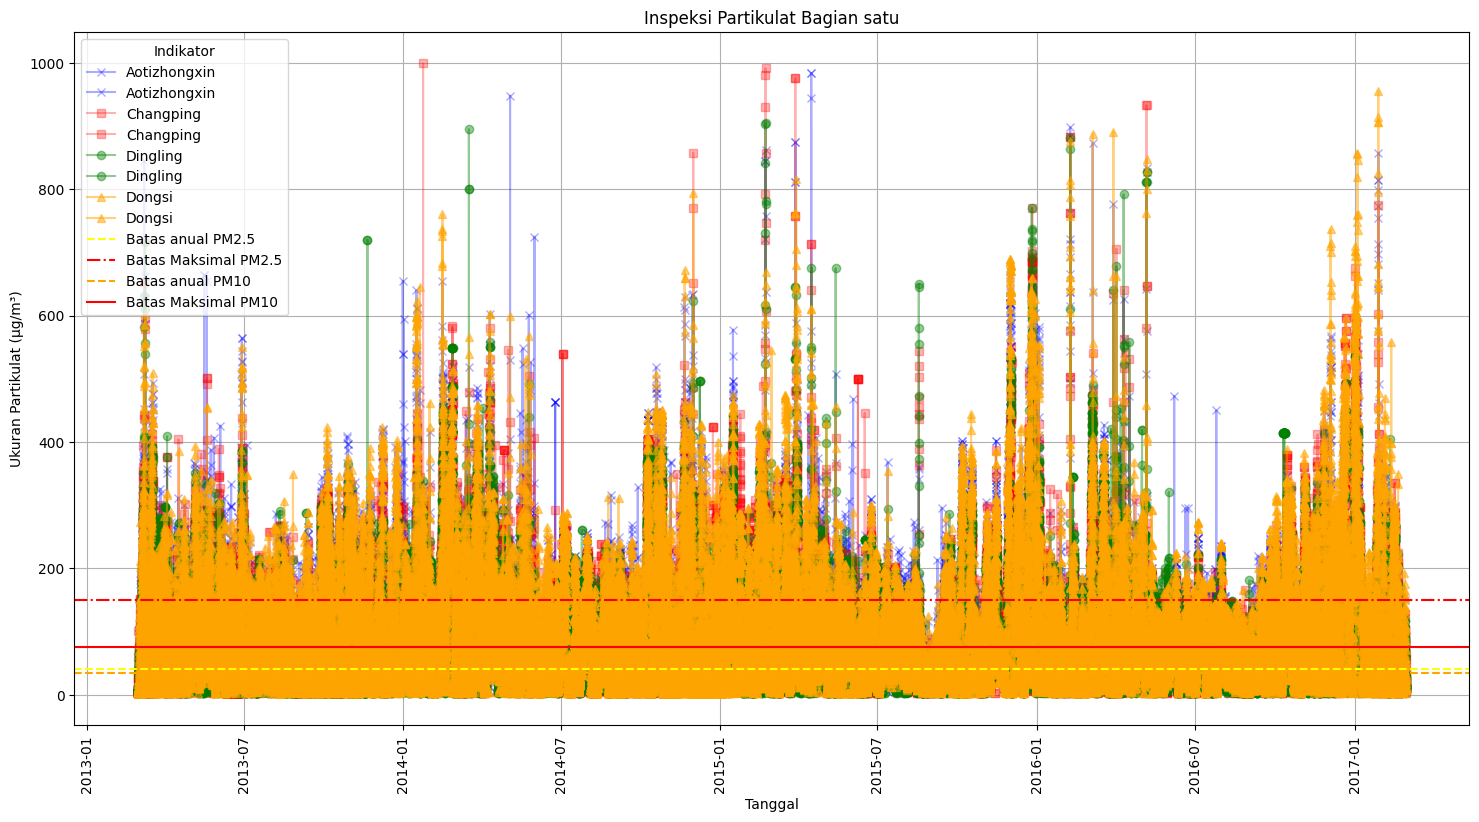

In [76]:
#Tahap awal visualisasi untuk pertanyaan 1 (a adalah PM2.5 b adalah PM10)
# Ilustrasi Kota Aotizhongxin sampai Dongsi
plt.figure(figsize=(18, 9))
plt.plot(dfaotizhongxin['datetime'], dailyao, marker='x', linestyle = '-', label = 'Aotizhongxin', color='blue', alpha = 0.33)
plt.plot(dfchangping['datetime'], dailycha, marker='s', linestyle = '-', label = 'Changping', color='red', alpha = 0.30)
plt.plot(dfdingling['datetime'], dailydin, marker='o', linestyle = '-', label = 'Dingling', color='green', alpha = 0.42)
plt.plot(dfdongsi['datetime'], dailydon, marker='^', linestyle = '-', label = 'Dongsi', color='orange', alpha = 0.5)

#Bagian batas keamanan
plt.axhline(y=anPMa, color='yellow', linestyle='--', label='Batas anual PM2.5')
plt.axhline(y=dlPMa, color='red', linestyle='-.', label='Batas Maksimal PM2.5')
plt.axhline(y=anPMb, color='orange', linestyle='--', label='Batas anual PM10')
plt.axhline(y=dlPMb, color='red', linestyle='-', label='Batas Maksimal PM10')

#bagian ilustrasi
plt.title('Inspeksi Partikulat Bagian satu')
plt.xlabel('Tanggal')
plt.ylabel('Ukuran Partikulat (µg/m³)')
plt.grid(True)
plt.legend(title = 'Indikator')
plt.xticks(rotation=90)

#eksekusi
plt.show()

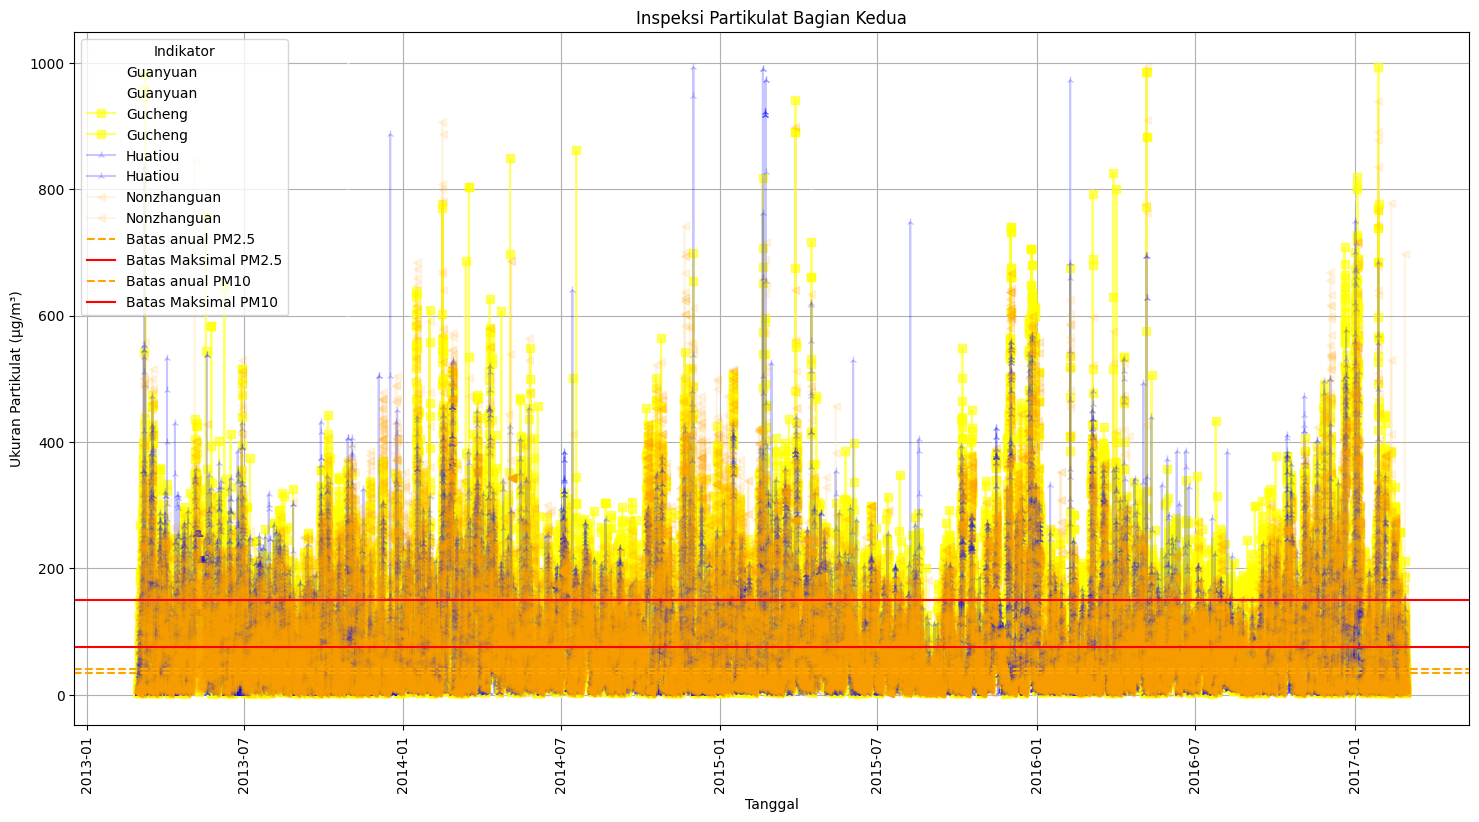

In [74]:
# Bagian Kota Guanyuan samapai Kota Nonzhanguan
plt.figure(figsize=(18, 9))
plt.plot(dfguanyuan['datetime'], dailygua, marker='x', linestyle = '-', label = 'Guanyuan', color='white', alpha = 0.33)
plt.plot(dfgucheng['datetime'], dailyguc, marker='s', linestyle = '-', label = 'Gucheng', color='yellow', alpha = 0.60)
plt.plot(dfhuairou['datetime'], dailyhua, marker='2', linestyle = '-', label = 'Huatiou', color='blue', alpha = 0.22)
plt.plot(dfnonzhanguan['datetime'], dailynon, marker='<', linestyle = '-', label = 'Nonzhanguan', color='orange', alpha = 0.10)

#Bagian batas keamanan
plt.axhline(y=anPMa, color='yellow', linestyle='--', label='Batas anual PM2.5')
plt.axhline(y=dlPMa, color='red', linestyle='-.', label='Batas Maksimal PM2.5')
plt.axhline(y=anPMb, color='orange', linestyle='--', label='Batas anual PM10')
plt.axhline(y=dlPMb, color='red', linestyle='-', label='Batas Maksimal PM10')

#bagian ilustrasi
plt.title('Inspeksi Partikulat Bagian Kedua')
plt.xlabel('Tanggal')
plt.ylabel('Ukuran Partikulat (µg/m³)')
plt.grid(True)
plt.legend(title = 'Indikator')
plt.xticks(rotation=90)

#eksekusi
plt.show()


In [ ]:
#Bagian terakhir (Kota Shunyi sampai Wanshouxigong)



### Pertanyaan 2:

In [29]:
#Tahap awal visualisasi untuk pertanyaan 2 (bagian pemeriksaan CO)


**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

In [30]:
#Analisis lanjutan (inspeksi suhu)

## Kesimpulan (Conclusion)

- Kesimpulan pertanyaan 1
- Kesimpulan pertanyaan 2